# 3.6. Generalização

Como cientistas de aprendizado de máquina, nosso objetivo é descobrir padrões. \
Mas como podemos ter certeza de que realmente descobrimos um padrão geral e não simplesmente memorizamos nossos dados? \
Na vida real, devemos ajustar os nossos modelos utilizando uma coleção finita de dados. \
Mesmo nesta escala extrema (milhões de dados disponíveis), o número de pontos de dados disponíveis permanece infinitamente pequeno em comparação com o espaço de todas as imagens possíveis com resolução de megapixels. \
Sempre que trabalhamos com amostras finitas, devemos ter em mente o risco de podermos ajustar os nossos dados de treino, apenas para descobrir que não conseguimos descobrir um padrão generalizável.  

O fenômeno de ajuste mais próximo de nossos dados de treinamento do que da distribuição subjacente (demais dados) é chamado de __overfitting__, e as técnicas para combater o overfitting são frequentemente chamadas de métodos de __regularização__. 


# 3.6.1. Erro de treinamento e erro de generalização

No cenário padrão de aprendizagem supervisionada, assumimos que os dados de treinamento e os dados de teste são extraídos __independentemente de distribuições idênticas (IID)__.

- erro de treinamento: R_emp
- erro de generalização: R

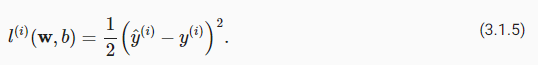

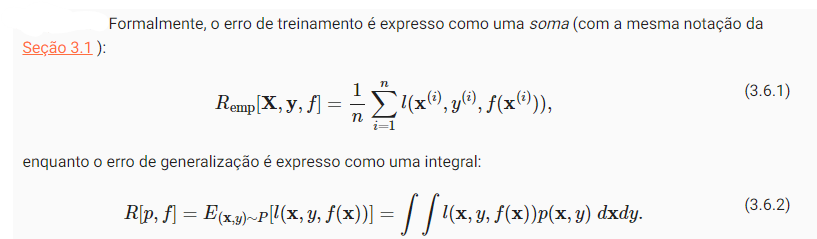

Problematicamente, nunca poderemos calcular o erro de generalização exatamente.
Como o conjunto é infinito, aplica-se a mesma fórmula usada para calcular o erro de treinamento empírico, mas a um conjunto de teste X' e y'.

 A questão central da generalização é então quando devemos esperar que o nosso erro de treino esteja próximo do erro da população (e, portanto, do erro de generalização).

# 3.6.1.1. Complexidade do modelo

Na teoria clássica, quando temos modelos simples e dados abundantes, os erros de treinamento e generalização tendem a ser próximos. Porém, quando trabalhamos com modelos mais complexos e/ou menos exemplos, esperamos que o erro de treinamento diminua, mas que a lacuna de generalização cresça.

Agora, o que constitui precisamente uma noção apropriada de complexidade do modelo é uma questão complexa. Freqüentemente, modelos com mais parâmetros são capazes de ajustar um número maior de rótulos atribuídos arbitrariamente. Contudo, isso não é necessariamente verdade.

Neste ponto, devemos enfatizar outro ponto importante que revisitaremos ao introduzir redes neurais profundas. Quando um modelo é capaz de ajustar rótulos arbitrários, um baixo erro de treinamento não implica necessariamente um baixo erro de generalização. No entanto, também não implica necessariamente um alto erro de generalização! Tudo o que podemos dizer com confiança é que um baixo erro de treinamento por si só não é suficiente para certificar um baixo erro de generalização. As redes neurais profundas acabam sendo exatamente esses modelos: embora generalizem bem na prática, são poderosas demais para nos permitir concluir qualquer coisa com base apenas no erro de treinamento. Nestes casos, devemos confiar mais nos nossos dados de validação para certificar a generalização após o facto. O erro nos dados de validação, ou seja, no conjunto de validação, é chamado de erro de validação .


# 3.6.2. Underfitting ou Overfitting?

Underfitting - modelo com baixo ajuste aos dados. Muito linear.
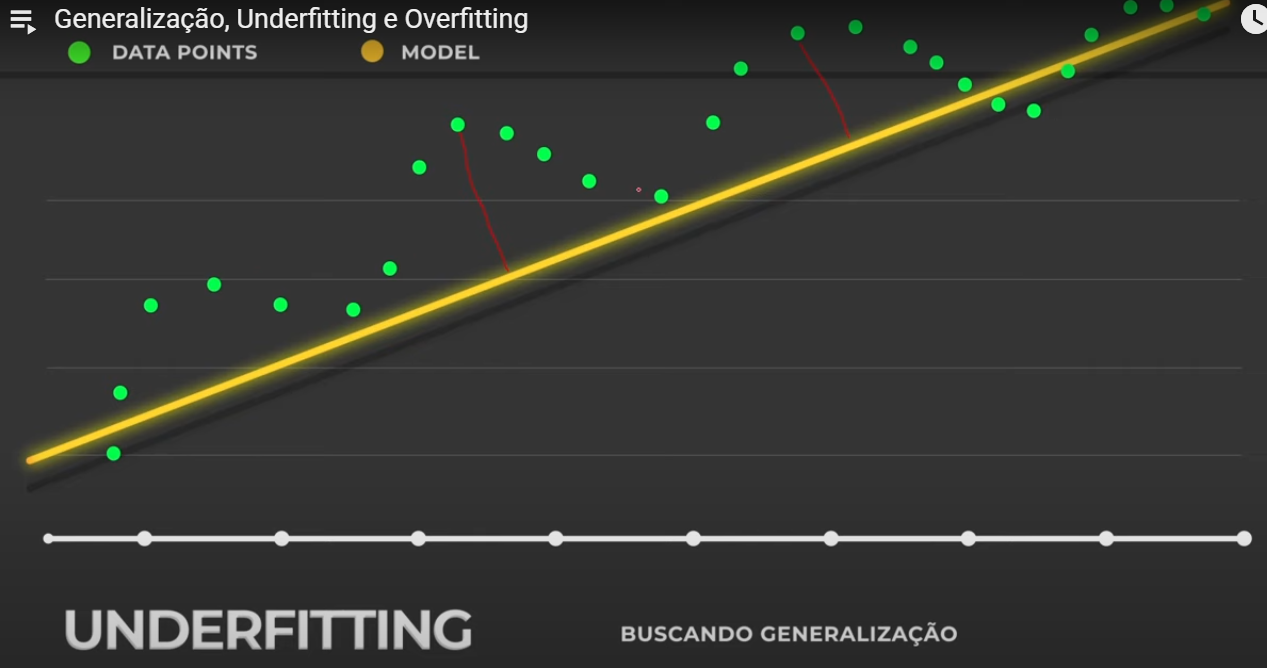

Overfitting - modelo com alto ajuste aos dados: acurácia de quase 100% com dados de treinamento, mas baixas com dados de teste (dados reais). Exatamente em cima do _data points_.
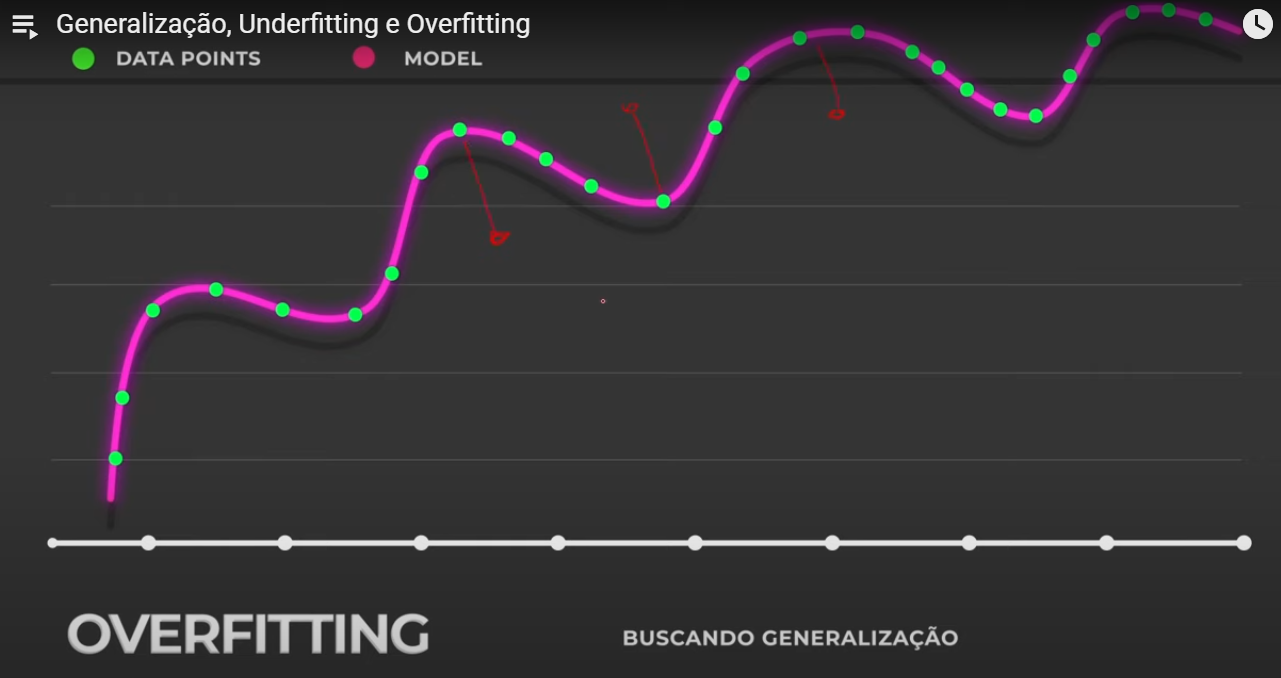

Modelo generalista: acompanha a tendência dos _data points_ sem estar em cima deles. Acurácia aproximada de 95% no treinamento e 92% no mundo real.
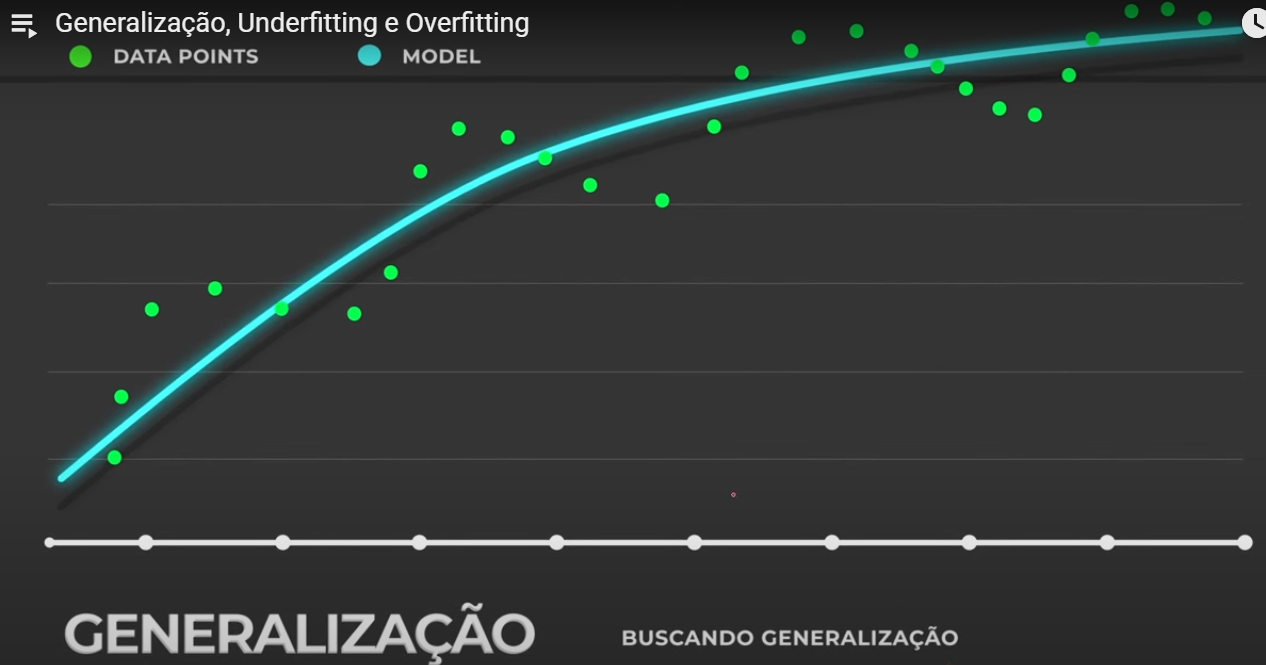

Se o modelo não for capaz de reduzir o erro de treinamento, isso pode significar que nosso modelo é muito simples (ou seja, insuficientemente expressivo) para capturar o padrão que estamos tentando modelar. Além disso, uma vez que a lacuna de generalização (R_emp - R) entre nossos erros de treinamento e generalização for pequeno, temos motivos para acreditar que poderíamos conseguir um modelo mais complexo. Este fenômeno é conhecido como underfitting.

Por outro lado, como discutimos acima, queremos estar atentos aos casos em que nosso erro de treinamento é significativamente menor que nosso erro de validação, indicando overfitting severo.

Observe que o overfitting nem sempre é uma coisa ruim. Especialmente no aprendizado profundo, os melhores modelos preditivos geralmente apresentam desempenho muito melhor em dados de treinamento do que em dados de validação.

Observe que se o erro de treinamento for zero, então a lacuna de generalização é precisamente igual ao erro de generalização e só podemos progredir reduzindo a lacuna.

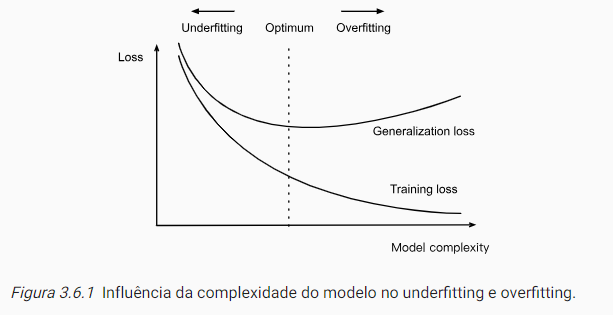

__Quando se treina em excesso (overfitting), o modelo perde a capacidade de generalização.__ A acurácia é boa no treinamento, mas não no mundo real (dados de teste).



__The relationship between training error and generalization error is a fundamental concept in machine learning. Training error is the error that a model makes on the data it was trained on, while generalization error is the error it makes on new, unseen data. The goal is to build a model that has a low generalization error, which indicates that it can perform well on data it has never encountered before.__

# 3.6.2.2. Tamanho do conjunto de dados¶

Como o limite acima já indica, outra grande consideração a ter em conta é o tamanho do conjunto de dados. Corrigindo nosso modelo, quanto menos amostras tivermos no conjunto de dados de treinamento, maior será a probabilidade (e mais grave) de encontrarmos overfitting. À medida que aumentamos a quantidade de dados de treinamento, o erro de generalização normalmente diminui. Além disso, em geral, mais dados nunca são demais.

__Para muitas tarefas, o aprendizado profundo só supera os modelos lineares quando milhares de exemplos de treinamento estão disponíveis.__

Em parte, o sucesso actual da aprendizagem profunda deve-se consideravelmente à abundância de enormes conjuntos de dados provenientes de empresas de Internet, ao armazenamento barato, aos dispositivos conectados e à ampla digitalização da economia.


# 3.6.3. Seleção de modelo

A escolha entre vários modelos é apropriadamente chamada de seleção de modelo .

Em princípio, não devemos mexer em nosso conjunto de testes antes de termos escolhido todos os nossos hiperparâmetros. Se usarmos os dados de teste no processo de seleção do modelo, existe o risco de superajustarmos os dados de teste. Então estaríamos em sérios apuros. Se ajustarmos demais nossos dados de treinamento, sempre haverá a avaliação dos dados de teste para nos manter honestos. Mas se ajustarmos demais os dados de teste, como saberemos? 

Assim, nunca devemos confiar nos dados de teste para a seleção do modelo. E, no entanto, não podemos confiar apenas nos dados de treinamento para a seleção do modelo, porque não podemos estimar o erro de generalização nos próprios dados que usamos para treinar o modelo.

Raramente podemos arcar com um novo conjunto de testes para cada rodada de experimentos. Na verdade, a reciclagem de dados de referência durante décadas pode ter um impacto significativo no desenvolvimento de algoritmos, por exemplo, para classificação de imagens e reconhecimento óptico de caracteres .

__A prática comum para resolver o problema de treinamento no conjunto de teste é dividir nossos dados de três maneiras, incorporando um conjunto de validação além dos conjuntos de dados de treinamento e teste.__

O resultado é um negócio obscuro onde os limites entre validação e dados de teste são preocupantemente ambíguos. Salvo indicação explícita em contrário, nos experimentos deste livro estamos realmente trabalhando com o que deveria ser corretamente chamado de dados de treinamento e dados de validação, sem conjuntos de testes verdadeiros. Portanto, a precisão relatada em cada experimento do livro é realmente a precisão da validação e não a verdadeira precisão do conjunto de testes.

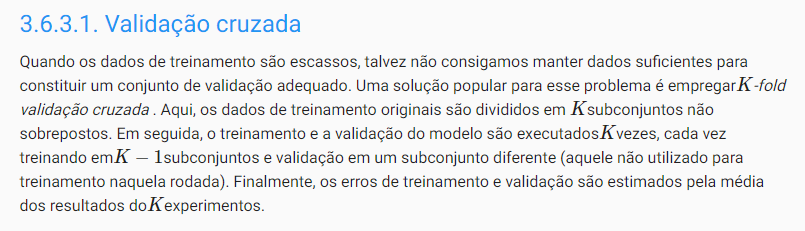


# 3.6.4. Resumo¶

Deixamos você com algumas regras básicas:

- Use conjuntos de validação (ou k-fold validação cruzada ) para seleção de modelo;

- Modelos mais complexos requerem frequentemente mais dados;

- As noções relevantes de complexidade incluem o número de parâmetros e a faixa de valores que eles podem assumir;

- Mantendo tudo o resto igual, mais dados quase sempre levam a uma melhor generalização;

- Toda essa conversa sobre generalização é baseada na suposição do IID. Se relaxarmos esta suposição, permitindo que as distribuições mudem entre os períodos de treino e de teste, então não poderemos dizer nada sobre generalização sem uma suposição adicional (talvez mais branda).

Com mais dados, o modelo pode reduzir o erro de generalização (erro em dados novos) e o risco de overfitting (ajuste excessivo aos dados de treinamento).

# Exercise

Answers: \
https://pandalab.me/archives/generalization

